<a href="https://colab.research.google.com/github/minhhung171002/CSE3VIS/blob/main/Skin_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory for the assignment
import os
SKELETON_DIR = '/content/drive/MyDrive/Uni/CSE3001/Assignment'
os.chdir(SKELETON_DIR)
! mkdir -p "$SKELETON_DIR/saved_models"
! mkdir -p "$SKELETON_DIR/logs"

# Set up auto-reloading modules from the working directory
%load_ext autoreload
%autoreload 2

# Install extra dependencies
!pip install -q wandb==0.15.0
!pip install -q torchmetrics==0.11.3
!pip install torchmetrics --upgrade

# Set the default figure size
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: torchmetrics
    Found existing installation: torchmetrics 0.11.3
    Uninstalling torchmetrics-0.11.3:
      Successfully uninstalled torchmetrics-0.11.3


In [ ]:
%%shell
DATA_URL='https://latrobeuni-my.sharepoint.com/:u:/g/personal/zhe_ltu_edu_au/Edn2-_XuX2pGptMfH6eVLIoB16_ofpRlZnCf6rwP47EkBQ?e=ogAWGM&download=1'

pushd /content
wget -O data.zip $DATA_URL
unzip -q data.zip
popd


/content /content/drive/MyDrive/Uni/CSE3001/Assignment
--2023-10-31 02:33:28--  https://latrobeuni-my.sharepoint.com/:u:/g/personal/zhe_ltu_edu_au/Edn2-_XuX2pGptMfH6eVLIoB16_ofpRlZnCf6rwP47EkBQ?e=ogAWGM&download=1
Resolving latrobeuni-my.sharepoint.com (latrobeuni-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to latrobeuni-my.sharepoint.com (latrobeuni-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/zhe_ltu_edu_au/Documents/CSE5DL%20data/data.zip?ga=1 [following]
--2023-10-31 02:33:29--  https://latrobeuni-my.sharepoint.com/personal/zhe_ltu_edu_au/Documents/CSE5DL%20data/data.zip?ga=1
Reusing existing connection to latrobeuni-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1043211099 (995M) [application/x-zip-compressed]
Saving to: ‘data.zip’

data.zip            100%[===================>] 994.88M  45.1MB/s    in 19s     

2023-10-31 02:33:48 (5

# Task 1 - Image Classification

**MARKS**: 97

In this first task, you will create a deep learning model to classify images of skin lesions into one of seven classes:

1.   "MEL" = Melanoma
2.   "NV" = Melanocytic nevus
3.   "BCC" = Basal cell carcinoma
4.   "AKIEC" = Actinic keratosis
5.   "BKL" = Benign keratosis
6.   "DF" = Dermatofibroma
7.   "VASC" = Vascular lesion

The data for this task is a subset of: https://challenge2018.isic-archive.com/task3/

The data for this task is inside the `/content/data/img` folder. It contains ~3,800 images named like `ISIC_000000.jpg` and the following label files:

*   `/content/data/img/train.csv`
*   `/content/data/img/val.csv`
*   `/content/data/img/train_small.csv`
*   `/content/data/img/val_small.csv`

The `small` versions are the first 200 lines of each partition and are included for debugging purposes. To save time, ensure your code runs on the `small` versions first.

**NOTE**: To explore the labels, you can click the above hyperlinks to open the relevant csv file.

## Task 1a. Explore the training set

**MARKS**: 8 (Code 6, Reports 2)

**INSTRUCTIONS**: Check for data issues, as we have done in the labs. Check the class distribution and at least 1 other potential data issue. Hint: Look in `explore.py` for a function that can plot the class distribution.

**REPORT**: What did you check for? What data issues are present in this dataset?

**HINT**: This task primarily requires "PyTorch Basics" lab.

In [ ]:
import pandas as pd

IMG_CLASS_NAMES = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"]

train_df = pd.read_csv('/content/data/img/train.csv')
val_df = pd.read_csv('/content/data/img/val.csv')



train_df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


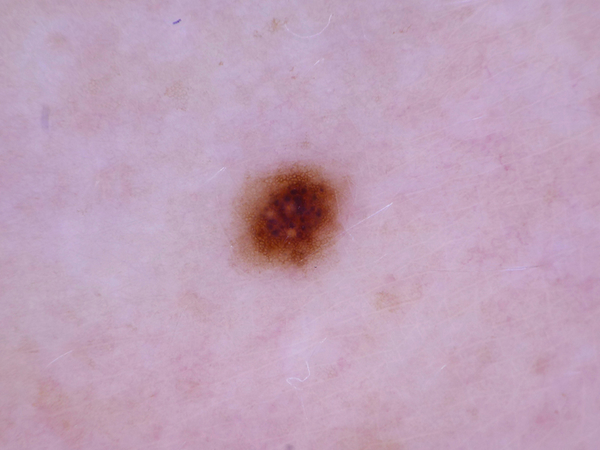

In [ ]:
from PIL import Image
# Change the filename to view other examples from the dataset
display(Image.open('/content/data/img/ISIC_0024437.jpg'))

Train Labels (First 10 Samples): [1 1 1 1 0 1 4 0 1 0]


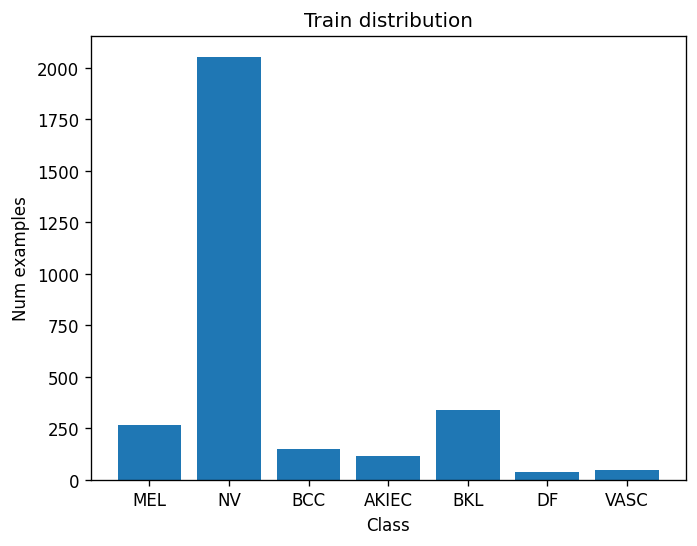

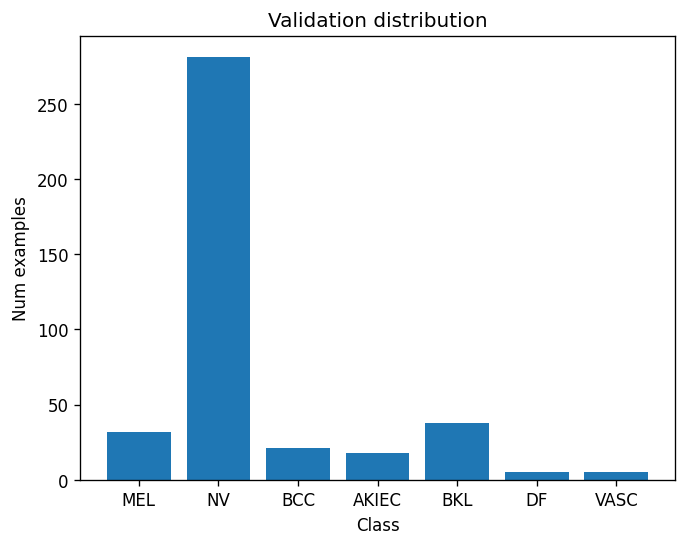

Number of training samples: 3004
Number of validation samples: 400
Missing values in the training dataset:
image    0
MEL      0
NV       0
BCC      0
AKIEC    0
BKL      0
DF       0
VASC     0
dtype: int64

Missing values in the validation dataset:
image    0
MEL      0
NV       0
BCC      0
AKIEC    0
BKL      0
DF       0
VASC     0
dtype: int64


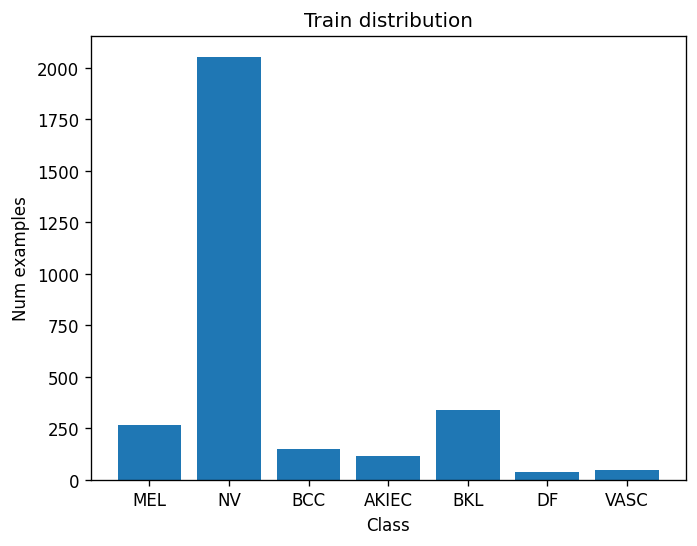

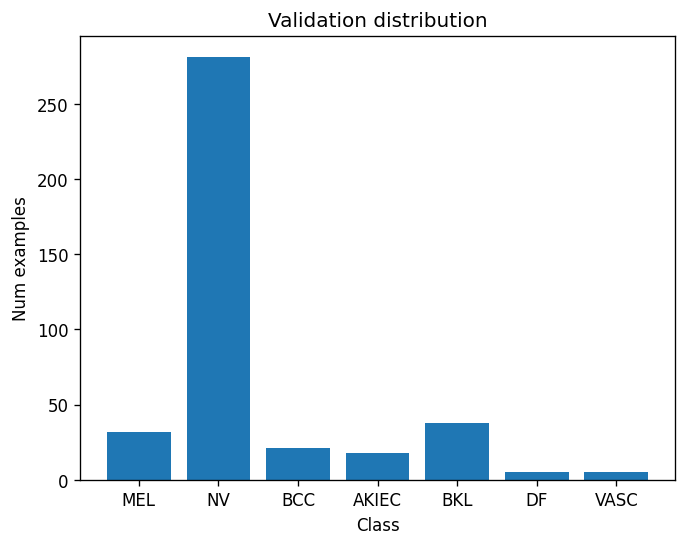

Number of training samples: 3004
Number of validation samples: 400


In [ ]:
import explore
# Convert one-hot encoded labels to integers
train_labels = train_df[IMG_CLASS_NAMES].values.argmax(axis=1)
val_labels = val_df[IMG_CLASS_NAMES].values.argmax(axis=1)

# Print the contents of train_labels to verify
print("Train Labels (First 10 Samples):", train_labels[:10])
# Plot class distribution for both train and val sets
explore.plot_label_distribution(train_labels, split='Train', class_names=IMG_CLASS_NAMES)
explore.plot_label_distribution(val_labels, split='Validation', class_names=IMG_CLASS_NAMES)
# Example: Check the dataset size
num_train_samples = len(train_df)
num_val_samples = len(val_df)
print("Number of training samples:", num_train_samples)
print("Number of validation samples:", num_val_samples)
import pandas as pd

# Load the training and validation datasets
train_df = pd.read_csv('/content/data/img/train.csv')
val_df = pd.read_csv('/content/data/img/val.csv')

# Check for missing values in the training dataset
train_missing_values = train_df.isnull().sum()
print("Missing values in the training dataset:")
print(train_missing_values)

# Check for missing values in the validation dataset
val_missing_values = val_df.isnull().sum()
print("\nMissing values in the validation dataset:")
print(val_missing_values)

# Convert one-hot encoded labels to integers
train_labels = train_df[IMG_CLASS_NAMES].values.argmax(axis=1)
val_labels = val_df[IMG_CLASS_NAMES].values.argmax(axis=1)

# Plot class distribution for both train and val sets
explore.plot_label_distribution(train_labels, split='Train', class_names=IMG_CLASS_NAMES)
explore.plot_label_distribution(val_labels, split='Validation', class_names=IMG_CLASS_NAMES)

# Example: Check the dataset size
num_train_samples = len(train_df)
num_val_samples = len(val_df)
print("Number of training samples:", num_train_samples)
print("Number of validation samples:", num_val_samples)







## Task 1b. Implement Training loop

**MARKS**: 22 (Code 20, Reports 2)

**INSTRUCTIONS**:

*   Implement LesionDataset in `datasets.py`. Use the cell below to test your implementation.
*   Implement the incomplete functions in `train.py` marked as "Task 1b"
*   Go to the [Model Training Cell](#task-1-model-training) at the end of Task 1 and fill in the required code for "Task 1b".

**REPORT**: Why should you *not use* `random_split` in your code here?

**HINT**: This task primarily requires "PyTorch Basics" lab.

In [ ]:
import datasets

ds = datasets.LesionDataset('/content/data/img', '/content/data/img/train.csv')

input, label = ds[0]
print(input)
print(label)


tensor([[[ 1.7352,  1.7694,  1.8037,  ...,  1.7352,  1.7523,  1.7694],
         [ 1.7865,  1.8208,  1.8208,  ...,  1.7180,  1.7352,  1.7523],
         [ 1.8208,  1.7865,  1.7865,  ...,  1.7694,  1.7523,  1.7352],
         ...,
         [ 1.4612,  1.4612,  1.4269,  ...,  1.5125,  1.5468,  1.5125],
         [ 1.4612,  1.4783,  1.4783,  ...,  1.4954,  1.5297,  1.4954],
         [ 1.4440,  1.4440,  1.4612,  ...,  1.4612,  1.4612,  1.4783]],

        [[ 0.2227,  0.2577,  0.2577,  ...,  0.2752,  0.2927,  0.3277],
         [ 0.2402,  0.2577,  0.2927,  ...,  0.2927,  0.3277,  0.3277],
         [ 0.2577,  0.2577,  0.2577,  ...,  0.3452,  0.3452,  0.3277],
         ...,
         [ 0.0651,  0.0301, -0.0049,  ...,  0.4503,  0.4503,  0.4153],
         [ 0.0476,  0.0476,  0.0301,  ...,  0.4678,  0.4678,  0.4328],
         [ 0.0476,  0.0476,  0.0301,  ...,  0.4153,  0.4328,  0.4678]],

        [[ 0.4439,  0.4962,  0.5659,  ...,  0.4788,  0.5136,  0.5659],
         [ 0.4788,  0.5485,  0.6008,  ...,  0

## Task 1c. Implement a baseline convolutional neural network

**MARKS**: 25 (Code 18, Reports 7)

You will implement a baseline convolutional neural network which you can compare results to. This allows you to evaluate any improvements made by hyperparameter tuning or transfer learning.

**INSTRUCTIONS**:

*   Implement a `SimpleBNConv` in `models.py` with:
    *   5 `nn.Conv2d` layers, with 8, 16, 32, 64, 128 output channels respectively, with the following between each convolution layer:
        *   `nn.ReLU()` for the activation function, and
        *   `nn.BatchNorm2d`, and
        *   finally a `nn.MaxPool2d` to downsample by a factor of 2.
*   Use a normalised confusion matrix on the model's validation predictions in `train.py`.
*  Go to the [Model Training Cell](#task-1-model-training) at the end of Task 1 and fill in the required code to train the model.

Training should take about 1 minute/epoch. Validation accuracy should be 60-70%, but UAR should be around 20-40%.

**REPORT**: As training sets get larger, the length of time per epoch also gets larger. Some datasets take over an hour per epoch. This makes it impractical to debug typos in your code since it can take hours after starting for the program to reach new code. Name two ways to significantly reduce how long **each** epoch takes - for debugging purposes - while still using real data and using the real training code.

**REPORT**: Show the confusion matrix and plots of the validation accuracy and UAR in your report, and explain what is going wrong.
(Right-click a plot and select "save image as..." to save the image to your computer)

**HINT**: This task primarily requires "Convolutional Neural Networks" lab.

## Task 1d. Account for data issues

**MARKS**: 12 (Code 8, Reports 4)

**INSTRUCTIONS**: Account for the data issues in Task 1a and retrain your model.

**REPORT**: How did you account for the data issues? Was it effective? How can you tell? Show another confusion matrix.

**IMPORTANT NOTE**: One of the techniques from the lab will cause a warning in the metric calculation on `train_small.csv`, but will work fine on `train.csv`.

**HINT**: This task primarily requires "Debugging Neural Networks" lab.

## Task 1e. Data Augmentation

**MARKS**: 10 (Code 4, Reports 6)

**INSTRUCTIONS**:

*   Add an `augment` flag to LesionDataset which specifies whether any augmentation is done to the images. Ensure it is set to `True` *only* for the training dataset.
*   Use random horizontal flips
*   Use at least 2 other different non-deterministic augmentations

**REPORT:** Are random vertical flips appropriate for this dataset? Why?

Using data augmentation does not guarantee improved model performance. Data augmentation can hurt test performance by making the model train on unrealistic images.

**REPORT**: What effect did Data Augmentation have on performance? Show a screenshot of the relevant graphs from Weights & Biases for evidence.

**CHALLENGE**: (3 marks) Apply 5 crop augmentation with crop size 200x300. Make a distinct model which uses 5 crops at once to give a single answer. Include in your report how you did this and report the effect on performance.

**HINT**: This task primarily requires "Image Augmentation" lab.

## Task 1f. Chase improved performance

**MARKS**: 20 (Code and reports)

**INSTRUCTIONS**:
*   Create a model from a pre-trained model from the torchvision model zoo. We recommend Resnet18, but you may use any model you like. You may freeze the weights of all layers except the last, or fine-tune all the weights. https://drive.google.com/file/d/12Bq-00qRNTBxzGZ9X_iqWndluB5hmuG1/view?usp=share_link
*   Create your own models, modifying the model architecture, try different losses, learning rates. Change anything you like except the evaluation metrics in search of a better model.

Train at least 10 different models, each with a different combination.

**REPORT**: Create a table in an excel spreadsheet that is similar to that used in Lab 3 to record your results. Make sure it includes every parameter of variation between your combinations as a separate column. Include notes about what you were thinking/hoping for each combination as a number column in the spreadsheet.

In addition to the excel spreadsheet generate a report using Weights and Biases of the models you trained and the performance curves. Save the report as a pdf and include this in your submission. Please see this link on how to generate reports with Weights and Biases. https://docs.wandb.ai/guides/reports

Play around with Weights and Biases to see what cool features you can dig out and use to better visualize the training results and use that to improve the information shared via the report.

**Important**: Write a discussion about the key findings from the experimental results. What worked? What didn't? You don't need to be correct, you just need to put forward a coherent and consistent argument based on your observed results.

**CHALLENGE REPORT**: (3 marks) Assuming you use the full dataset in a single epoch, if you halve the size of the batch size, what happens to the number of times that you update the weights per epoch? With reference to the gradients, under what circumstances is this good?

**HINT**: The first part of this task primarily requires "Transfer Learning" lab.

<a name="task-1-model-training"></a>
## Model Training Cell

Based on what you have implemented in the above sections, you can try to complete the whole training process here.


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd  # Import Pandas for data manipulation

import datasets
import models
import train
import explore  # Import your explore.py module

# Set a random seed for reproducibility
torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64



# Drop rows with missing values
train_df.dropna(inplace=True)
val_df.dropna(inplace=True)



# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)

# Create a weighted sampler
weighted_sampler = WeightedRandomSampler(class_weights, len(train_dataset), replacement=True)

# Create LesionDataset with cleaned data
train_dataset = datasets.LesionDataset('/content/data/img', '/content/data/img/train.csv', augment=True)
val_dataset = datasets.LesionDataset('/content/data/img', '/content/data/img/val.csv')
# Create a data loader with the weighted sampler
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=weighted_sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Instantiate model, optimizer, and criterion
model = models.SimpleBNConv()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train model
train.train_model(
    model,
    train_loader,
    val_loader,
    optimizer,
    criterion,
    IMG_CLASS_NAMES,
    NUM_EPOCHS,
    project_name="CSE3001 Assignment Task 1",
    ident_str="27/10/2023"
)

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

RuntimeError: ignored